# Effects of alcohol on study maths

## Attributes

- ####  school -> student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- ####  sex -> student's sex (binary: 'F' - female or 'M' - male)
- ####  age -> student's age (numeric: from 15 to 22)
- ####  address -> student's home address type (binary: 'U' - urban or 'R' - rural)
- ####  famsize -> family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- ####  Pstatus -> parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- ####  Medu -> mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- ####  Fedu -> father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- ####  Mjob -> mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- ####  Fjob -> father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- ####  reason -> reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- ####  guardian -> student's guardian (nominal: 'mother', 'father' or 'other')
- ####  traveltime -> home to school travel time (numeric: 1 - 1 hour)
- ####  studytime -> weekly study time (numeric: 1 - 10 hours)
- ####  failures -> number of past class failures (numeric: n if 1<=n<3, else 4)
- ####  schoolsup -> extra educational support (binary: yes or no)
- ####  famsup -> family educational support (binary: yes or no)
- ####  paid -> extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- ####  activities -> extra-curricular activities (binary: yes or no)
- ####  nursery -> attended nursery school (binary: yes or no)
- ####  higher -> wants to take higher education (binary: yes or no)
- ####  internet -> Internet access at home (binary: yes or no)
- ####  romantic -> with a romantic relationship (binary: yes or no)
- ####  famrel -> quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- ####  freetime -> free time after school (numeric: from 1 - very low to 5 - very high)
- ####  goout -> going out with friends (numeric: from 1 - very low to 5 - very high)
- ####  Dalc -> workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- ####  Walc -> weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- ####  health -> current health status (numeric: from 1 - very bad to 5 - very good)
- ####  absences -> number of school absences (numeric: from 0 to 93)
- ####  G1 -> first period grade (numeric: from 0 to 20)
- ####  G2 -> second period grade (numeric: from 0 to 20)
- ####  G3 -> final grade (numeric: from 0 to 20, output target)


## Import Libraries

In [68]:
import pandas as pd
import numpy as np
import joblib


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
%matplotlib inline

## Load data

In [69]:
data = pd.read_csv('Maths.csv')

## Basic data exploration

In [70]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [71]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Check for missing values

In [73]:
#missing values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Check for outliers

In [74]:
#outliers
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Data preparation

In [75]:
#objects to int
data['school'] = data['school'].map({'GP': 0, 'MS': 1})
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['address'] = data['address'].map({'U': 0, 'R': 1})
data['famsize'] = data['famsize'].map({'LE3': 0, 'GT3': 1})
data['Pstatus'] = data['Pstatus'].map({'T': 0, 'A': 1})
data['schoolsup'] = data['schoolsup'].map({'yes': 1, 'no': 0})
data['famsup'] = data['famsup'].map({'yes': 1, 'no': 0})
data['paid'] = data['paid'].map({'yes': 1, 'no': 0})
data['activities'] = data['activities'].map({'yes': 1, 'no': 0})
data['nursery'] = data['nursery'].map({'yes': 1, 'no': 0})
data['higher'] = data['higher'].map({'yes': 1, 'no': 0})
data['internet'] = data['internet'].map({'yes': 1, 'no': 0})
data['romantic'] = data['romantic'].map({'yes': 1, 'no': 0})
data['Mjob'] = data['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
data['Fjob'] = data['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
data['reason'] = data['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
data['guardian'] = data['guardian'].map({'mother': 0, 'father': 1, 'other': 2})



data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10


## Check for correlation

<AxesSubplot: >

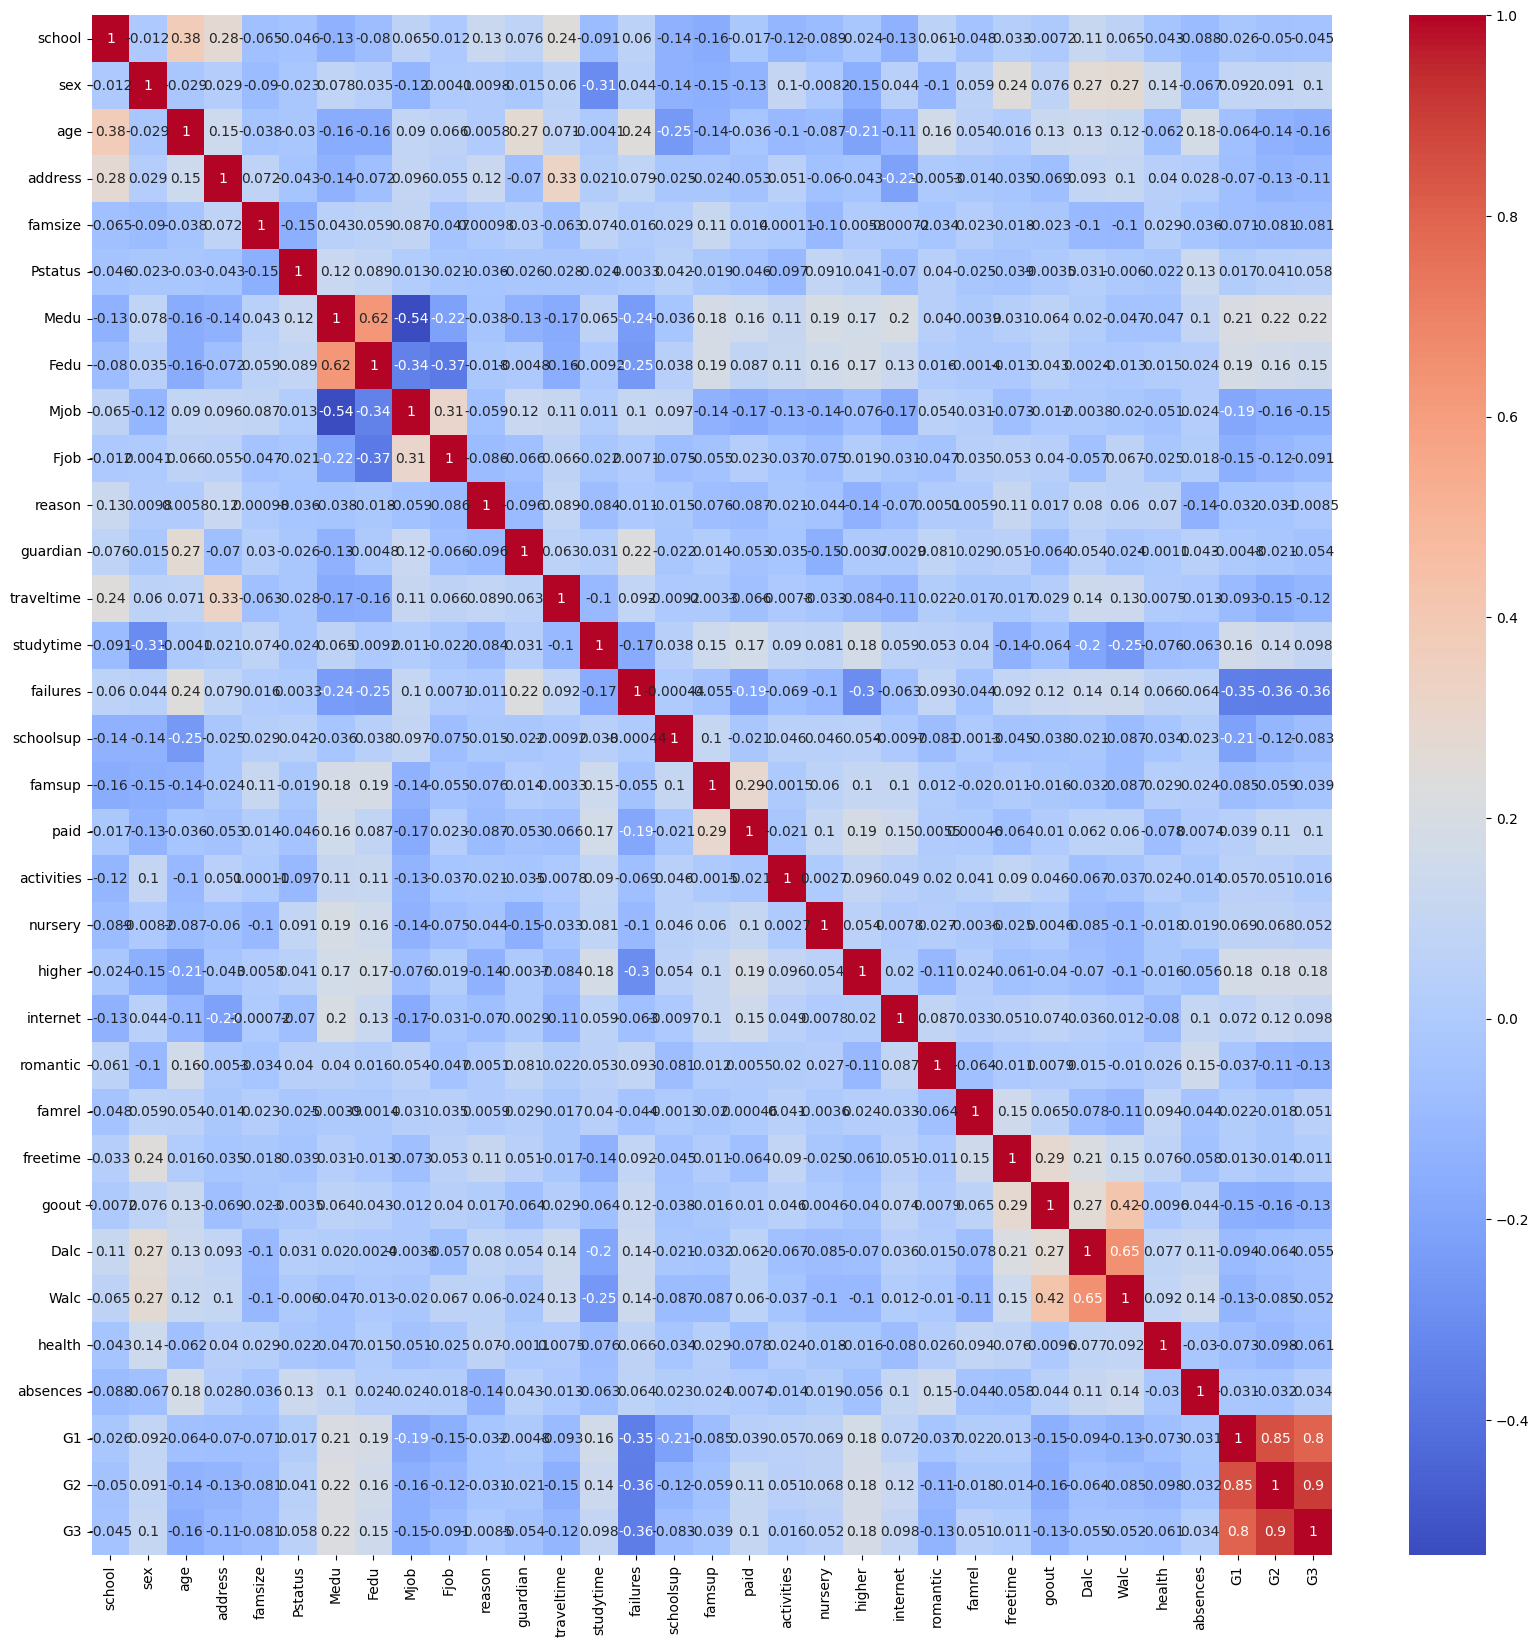

In [77]:
#correlation
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
